In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

test = pd.read_csv("./cs-test.csv",index_col = 0)
train = pd.read_csv('./cs-training.csv',index_col = 0)
sample = pd.read_csv('./sampleEntry.csv')


In [2]:
# can see only monthlyincome and dependents have missing values, 
# will probably impute dependent nulls with 0
# col2 seems to have a high max, will investigate as well


train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


0.06684


(array([139974.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  10026.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

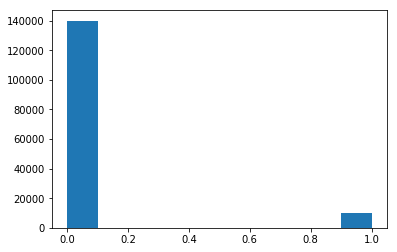

In [108]:
# 6.7% of people default in this dataset
print(train[train['SeriousDlqin2yrs'] == 1]['SeriousDlqin2yrs'].count()/train.shape[0])
plt.hist(train['SeriousDlqin2yrs'])

In [3]:
# can see only monthlyincome and dependents have missing values, 
# will probably impute dependent nulls with 0
# col2 seems to have a high max, will investigate as well
test.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [4]:
# can see that 3800 people have <200 monthly income and the majority being 0 or 1, will look to correct

stackt = pd.concat([test,train], keys=['test', 'train'])
print(stackt[(stackt['MonthlyIncome']<200)].shape)
print(stackt[(stackt['MonthlyIncome']<50)].shape)

(3829, 11)
(3711, 11)


In [5]:
#we see that for the entries with no MonthlyIncome, 
# if theres no monthly income and debt ratio > 100, make monthly income = debt ratio
# debt ratio to be np.mean(stackt[stackt['MonthlyIncome'].notnull()]['DebtRatio'])
stackt[stackt['MonthlyIncome'].isna()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29731.000000,49834.000000,49834.000000,49834.000000,49834.000000,0.0,49834.000000,49834.000000,49834.000000,49834.000000,43284.000000
mean,0.056137,6.414190,56.494582,0.616306,1652.894831,NaN,7.232030,0.516294,0.866898,0.484930,0.318686
std,0.230189,218.592754,15.462998,6.512606,3742.280478,NaN,4.879685,6.506852,1.022102,6.499165,0.814495
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.015859,46.000000,0.000000,123.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081191,57.000000,0.000000,1154.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.439414,67.000000,0.000000,2381.750000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,52.000000,98.000000,23.000000,98.000000,9.000000


In [6]:
stackt[(stackt['MonthlyIncome'].notnull()) & (stackt['MonthlyIncome'] < 100)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,2277.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000
mean,0.036891,2.761416,47.565264,0.669526,1465.867569,0.793621,7.093809,0.553203,0.733852,0.543822,0.775663
std,0.188535,101.027798,16.205309,6.986803,4692.041945,5.273412,4.956734,6.982748,0.897825,6.979933,1.222360
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.022445,35.000000,0.000000,87.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.121208,46.000000,0.000000,718.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.524504,60.000000,0.000000,1834.000000,1.000000,10.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,5893.000000,103.000000,98.000000,202990.000000,84.000000,85.000000,98.000000,9.000000,98.000000,20.000000


In [7]:
# debt ratios are inflated by those with monthly income 0 or 1 and debt ratios in the thousands,
# will take mean debt ratio for those with > 100 monthly income which is still nearly 200k people 
drm = np.mean(stackt[(stackt['MonthlyIncome'].notnull()) & (stackt['MonthlyIncome'] > 100)]['DebtRatio'])

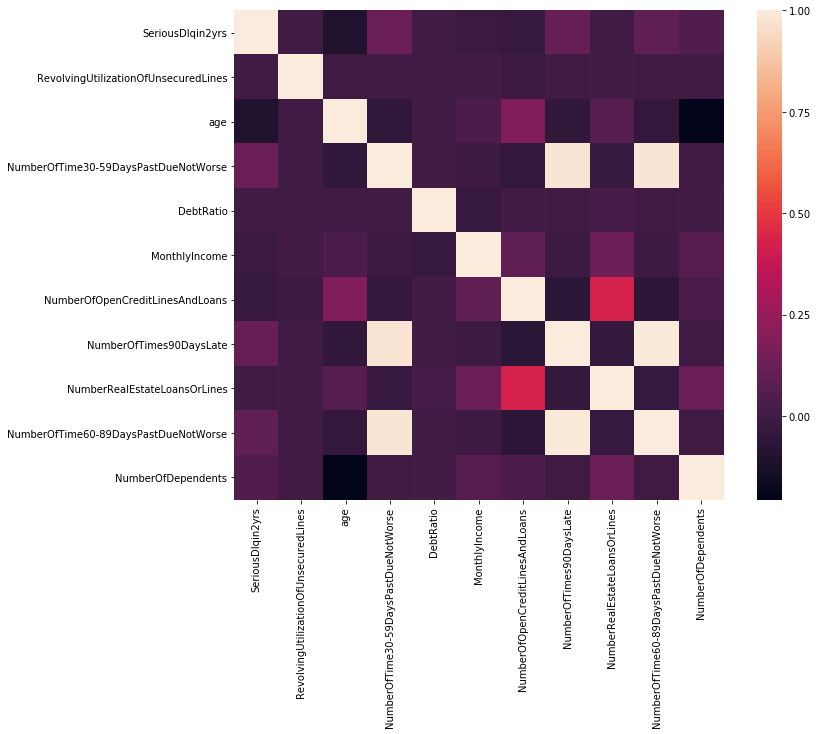

In [8]:
# can see from correlation matrix that numberoftimesvariables have extremely high correlation
# will pick 30-59 as it's most recent
nn = train[train['MonthlyIncome'].notnull()]
corrmat = nn.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, square = True)

In [9]:
cols = list(stackt.columns)
cols.remove('NumberOfTimes90DaysLate')
cols.remove('NumberOfTime60-89DaysPastDueNotWorse')

sns.set()
sns.pairplot(stackt[cols],size = 2.5)

In [11]:
# get indices of DR of customers with <100 monthly income to update with
clean2 = stackt[(stackt['MonthlyIncome'].notnull()) & (stackt['MonthlyIncome'] < 100)]['DebtRatio']

# create df and add second column for mean DR to update the inflated DRs with
# will deduce if further manipulation is required for those with 0-100 debratio that is now low monthlyincome
df2 = pd.DataFrame(clean2)
df2['DR2'] = drm

In [12]:
stackt['MonthlyIncome'].update(clean2)
stackt['DebtRatio'].update(df2['DR2'])

In [13]:
nan_dr = stackt[stackt['MonthlyIncome'].isnull()]['DebtRatio']
nan_df = pd.DataFrame(nan_dr)
nan_df['DR2'] = drm

In [14]:
stackt['MonthlyIncome'].update(nan_dr)
stackt['DebtRatio'].update(nan_df['DR2'])

In [15]:
#can see theres 4 people with an extremely high number of dependents, probably wrong
#20,43, 20 and 13, will take the floor of them / 10
stackt[stackt['NumberOfDependents']>10]['NumberOfDependents']
high_dep = stackt[stackt['NumberOfDependents']>10]['NumberOfDependents']//10
stackt['NumberOfDependents'].update(high_dep)


In [16]:
# fill NaN numofdeps with mean value
depmean = np.mean(stackt['NumberOfDependents'])
stackt['NumberOfDependents'].fillna(depmean, inplace = True)

In [17]:
stackt.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,251503.000000,251503.000000,251503.000000,251503.000000,2.515030e+05,251503.000000,251503.000000,251503.000000,251503.000000,251503.000000
mean,0.066840,5.750415,52.339694,0.434245,0.385897,5.757614e+03,8.453064,0.278370,1.016155,0.252466,0.761640
std,0.249746,229.633980,14.775120,4.335643,0.941440,2.318072e+04,5.145194,4.312539,1.121935,4.299204,1.104395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029977,41.000000,0.000000,0.183865,2.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153575,52.000000,0.000000,0.375789,4.500000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.561293,63.000000,0.000000,0.410571,7.434000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,207.830258,7.727000e+06,85.000000,98.000000,54.000000,98.000000,10.000000


(array([1.5207e+05, 4.3935e+04, 3.2822e+04, 1.6106e+04, 4.8580e+03,
        1.2720e+03, 2.8300e+02, 1.0100e+02, 4.0000e+01, 1.6000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

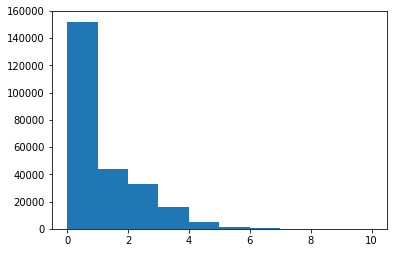

In [18]:
plt.hist(stackt['NumberOfDependents'])

In [60]:
dropcols = ['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']
stackt.drop(dropcols, axis = 1)

train_clean = stackt.loc['train'].drop(dropcols, axis = 1)
test_clean = stackt.loc['test'].drop(dropcols, axis = 1)

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns = log_cols)

X = train_clean.iloc[:,1:]
y = train_clean.iloc[:,0]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
acc_dict = {}


classifiers = [
    KNeighborsClassifier(3),
#     SVC(probability = True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test,train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc
        
acc_dict

F:\Programs\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'KNeighborsClassifier': 0.9268686868686868,
 'DecisionTreeClassifier': 0.891959595959596,
 'RandomForestClassifier': 0.9321818181818182,
 'AdaBoostClassifier': 0.9347474747474748,
 'GradientBoostingClassifier': 0.9354343434343434,
 'GaussianNB': 0.9296969696969697,
 'LinearDiscriminantAnalysis': 0.9341010101010101,
 'QuadraticDiscriminantAnalysis': 0.9285858585858586,
 'LogisticRegression': 0.9342424242424242}

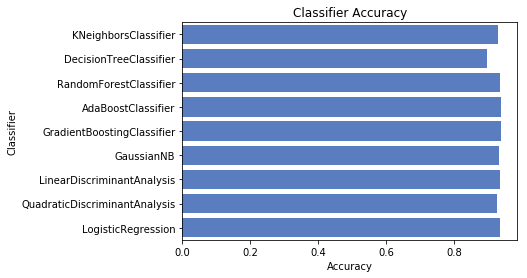

In [50]:
log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns = log_cols)


for clf in acc_dict:
#     acc_dict[clf] = acc_dict[clf] / 10
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y ="Classifier", data = log , color = "b")